# Quick Start

Prophet giống như một API mô hình trong `sklearn`. Chúng ta có thể tạo ra một thực thể của lớp `Prophet` và sau đó gọi 2 phương thức `fit` và `predict`

Đầu vào của Prophet luôn là một dataframe có 2 cột: `ds` và `y`. Cột `ds` (datestamp) pải có định dạng mà Pandas mong đợi, lý tưởng nhất là YYYY-MM-Đ cho một ngày hoặc YYYY-MM-DD HH:MM:SS cho một timestamp. Cột y phải là số và đại diện cho phép đo mà chung ta muốn dự báo.

Ví dụ: Hãy xem chuỗi thời gian của nhật ký lượt xem trang hằng ngày cho trang Wikipedia về [Peyton Manning](https://en.wikipedia.org/wiki/Peyton_Manning). Chúng ta đã thu nhập dữ liệu này bằng cách sử dụng gói [Wikipediatrend](https://cran.r-project.org/web/packages/wikipediatrend/index.html) trong R. Peyton Manning cung cấp một ví dụ hay vì nó minh họa một số tính năng của Prophet, chẳng như multiple seasonality, tỷ lệ tăng trưởng thay đổi (changing growth rates), và khả năng lập mô hình các ngày đặc biệt (chẳng hạng như các trận đấu loại trực tiếp và xuất hiện siêu cup của Manning). File CSV có sẵn [tại đây](https://github.com/facebook/prophet/blob/main/examples/example_wp_log_peyton_manning.csv)

Đầu tiên, chúng ta sẽ import  dữ liệu:

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


Chúng ta fit mô hình bằng cách khởi tạo một đối tượng `Prophet` mới. Mọi cài đặt cho thủ tục dự báo đều được chuyển vào constructor. Sau đó, bạn gọi phương thức `fit` của nó và truyền vào dataframe lịch sử. Quá trình fitting sẽ mất từ 1-5 giây

In [3]:
m=Prophet()
m.fit(df)

20:19:02 - cmdstanpy - INFO - Chain [1] start processing
20:19:02 - cmdstanpy - INFO - Chain [1] done processing


Sau đó, các dự đoán được thực hiện trên một dataframe có cột `ds` chứa các ngày dự đoán sẽ thực hiên. Bạn có thể nhận được một dataframe phù hợp mở rộng trong tương lai một số ngày được chỉ định bằng cách sử dụng phương thức trợ giúp `Prophet.make_future_dataframe`. Theo mặc định, nó cũng sẽ bao gồm các ngày trong lịch sử, vì vậy chúng tôi cũng sẽ thấy mô hình phù hợp.

In [4]:
future=m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


Phương thức `predict`sẽ gán cho mỗi hàng trong `tương lai` một giá trị dự đoán mà nó đặt là `yhat`. Nếu bạn vượt qua các ngày trong lịch sử, nó sẽ cung cấp một sự phù hợp trong mẫu. Đối tượng `dự báo (forecast)` ở đây là một dataframe dữ liệu mới bao gồm cột `yhat` với dự báo, cũng như các cột cho các thành phần và khoảng không chắc chắn.

In [5]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204233,7.493752,8.988226
3266,2017-01-16,8.529241,7.801439,9.243305
3267,2017-01-17,8.316651,7.674901,9.071437
3268,2017-01-18,8.149239,7.364892,8.885509
3269,2017-01-19,8.161151,7.412060,8.919135


Bạn có thể plot dự báo bằng cách gọi phương thức `Prophet.plot` và truyền vào dataframe dự báo của bạn

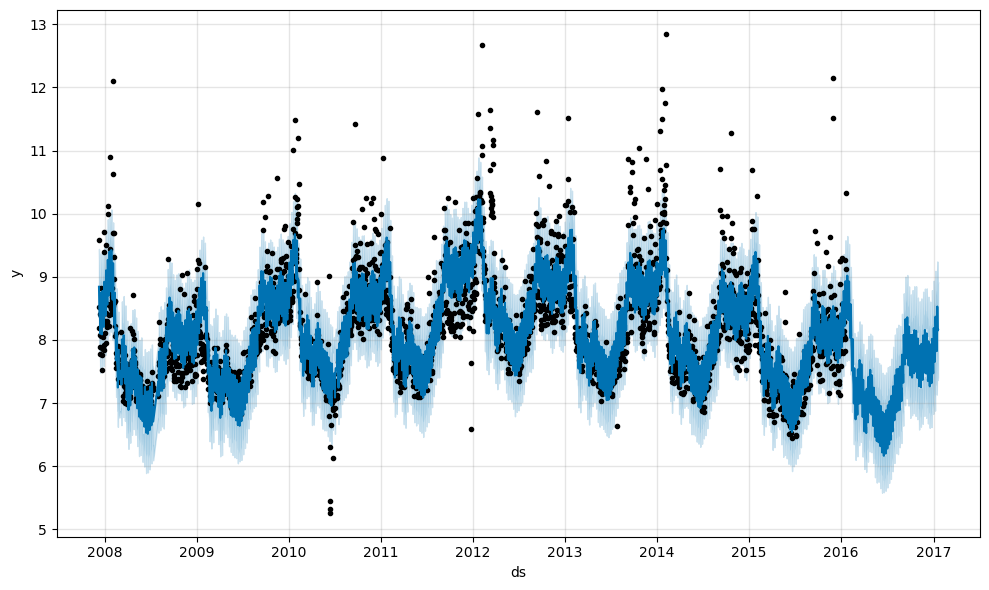

In [6]:
fig1=m.plot(forecast)

Nếu bạn muốn xem các thành phần dự báo, bạn có thể sử dụng phương thức `Prophet.plot_components`. Theo mặc định, bạn sẽ thấy trend, yearly seasonality, và weekly seasonality của chuỗi thời gian. Nếu bạn bao gồn các ngày lễ, bạn cũng sẽ thấy những ngày lễ đó ở đây.

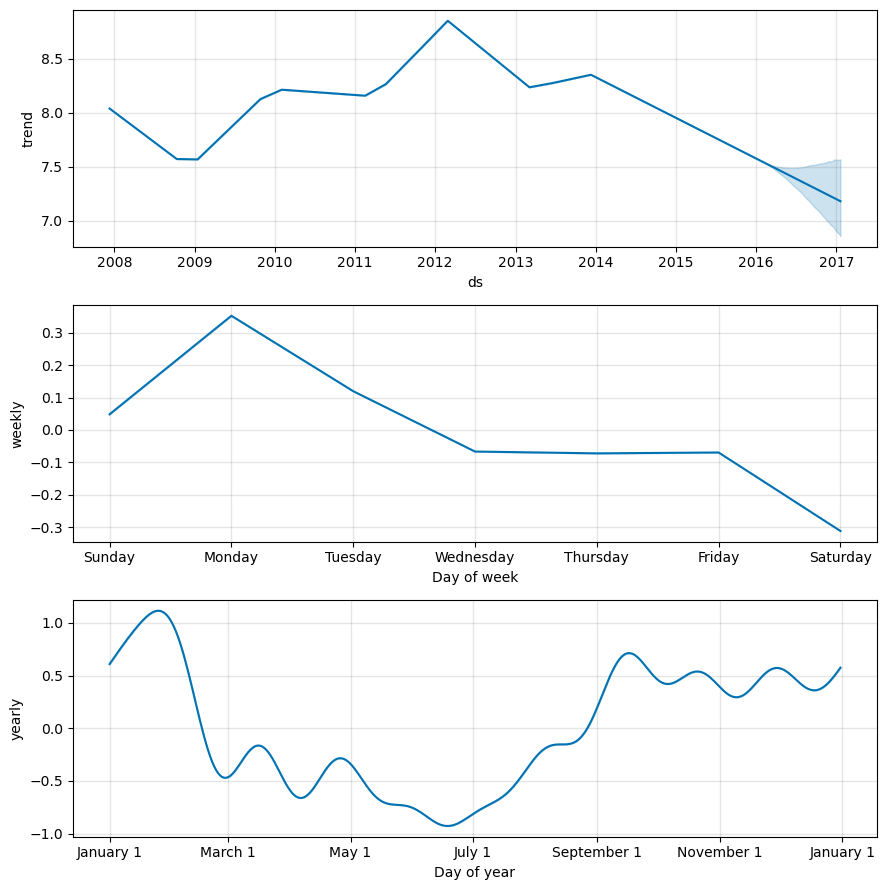

In [7]:
fig2=m.plot_components(forecast)

Một figure tương tác của dự báo và các thành phần có thể được tạo bằng `plotly`. Bạn sẽ cần cài đặt `plotly 4.0` trở lên, vì theo mặc định, nó sẽ không được cài đặt với Prophet. Bạn cũng sẽ cần cái đătk các gói `notebook` và `ipywidgets`

In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m,forecast)

In [9]:
plot_components_plotly(m,forecast)

Thông tin chi tiết về các tùy chọn có sẵn cho từng phương thức có sẵn trong chuỗi tài liệu, ví dụ, thông qua `help(Prophet)` hoặc `help(Prophet.fit)`. [R reference manual](https://cran.r-project.org/web/packages/prophet/prophet.pdf) trên CRAN cung cấp một danh sach ngắn gọi về tất cả các chức năng có sẵn, mỗi chức năng có một Python tương đương.